# 1. Import data

Here we import a shapefile that contains all the information for each NUTS3

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/WNV_Europe_Paper/')

In [6]:
import geopandas as gpd

gdf = gpd.read_file('Data/Shapefiles/20240627_APES FINAL_metric.shp')
gdf.head()

,NUTS_CO,NUTS_NA,RcrdTyp,Ttl_cs2,Forest,Shrub,Urban,Crop,Water,Other,...,gdp,incidnc,pop_dns,forest2,shrub2,crop2,urban2,water2,other2,geometry
0,AE,None,DENGUE,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,AE_MV_SA,None,ZIKV,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,AF,None,DENGUE,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,AG,None,CHIK,12.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,AG,None,DENGUE,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [7]:
gdf.columns

Index(['NUTS_CO', 'NUTS_NA', 'RcrdTyp', 'Ttl_cs2', 'Forest', 'Shrub', 'Urban',
       'Crop', 'Water', 'Other', 'Mn_T_Wn', 'Tt_GD_W', 'Mx_GD_W', 'Mn_P_Wn',
       'Sm_P_Wn', 'Mx_WD_W', 'Mx_DD_W', 'Mn_T_Sp', 'Tt_GD_Sp', 'Mx_GD_Sp',
       'Mn_P_Sp', 'Sm_P_Sp', 'Mx_WD_Sp', 'Mx_DD_Sp', 'Mn_T_Sm', 'Tt_GD_Sm',
       'Mx_GD_Sm', 'Mn_P_Sm', 'Sm_P_Sm', 'Mx_WD_Sm', 'Mx_DD_Sm', 'Mn_T_At',
       'Tt_GD_A', 'Mx_GD_A', 'Mn_P_At', 'Sm_P_At', 'Mx_WD_A', 'Mx_DD_A',
       'area', 'popultn', 'gdp', 'incidnc', 'pop_dns', 'forest2', 'shrub2',
       'crop2', 'urban2', 'water2', 'other2', 'geometry'],
      dtype='object')

# 2. Figure 1
We generate the Figure 1 of the paper as the incidence of the cases in each NUTS3

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
bins = [0, 1, 10, 100, np.inf]
labels = [
    "0 < I ≤ 1",
    "1 < I ≤ 10",
    "10 < I ≤ 100",
    "I ≥ 100"
]

gdf['incidnc100'] = gdf['incidnc']*100000

# Create a categorical column
gdf['I_class'] = np.select(
    [
        gdf['incidnc100'] == 0,
        (gdf['incidnc100'] > 0) & (gdf['incidnc100'] <= 1),
        (gdf['incidnc100'] > 1) & (gdf['incidnc100'] <= 10),
        (gdf['incidnc100'] > 10) & (gdf['incidnc100'] <= 100),
        (gdf['incidnc100'] > 100)
    ],
    [
        "I = 0",
        "0 < I ≤ 1",
        "1 < I ≤ 10",
        "10 < I ≤ 100",
        "I ≥ 100"
    ],
    default="No data"
)

colors = {
    "I = 0": "whitesmoke",   # white
    "0 < I ≤ 1": "yellow",  # very light red
    "1 < I ≤ 10": "orange", # light red
    "10 < I ≤ 100": "red", # medium red
    "I ≥ 100": "black"   # dark red
}

In [9]:
# --- Load a light grey world basemap ---
url = "Data/Shapefiles/world-administrative-boundaries.zip"
world = gpd.read_file(url)
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
url1 = 'Data/Shapefiles/NUTS_RG_20M_2024_4326.zip'
nuts3 = gpd.read_file(url)

In [11]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.7 MB/s eta 0:00:00


In [12]:
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# --- Projection ---
proj = ccrs.PlateCarree()  # simple lat/lon projection

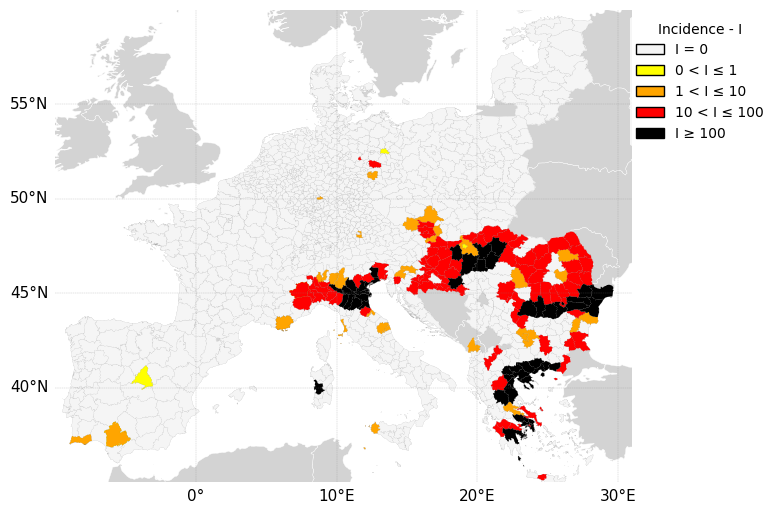

In [13]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': proj})
world.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.3, zorder=0)
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.02, zorder=1)
for cat, color in colors.items():
    subset = gdf[gdf['I_class'] == cat]
    if not subset.empty:  # ✅ skip empty categories
        subset.plot(ax=ax, color=color, edgecolor='black', linewidth=0.02)


# Legend
patches = [mpatches.Patch(facecolor=color, label=cat, edgecolor='black') for cat, color in colors.items()] # Use facecolor instead of color
legend = plt.legend(handles=patches, title="Incidence - I", loc='upper right', bbox_to_anchor=(1.25, 1))
legend.get_frame().set_facecolor('white') # Set the legend background to white
legend.get_frame().set_edgecolor('none') # Remove legend border

# --- Style ---
ax.set_axis_off()
ax.set_xlim(-10, 31)
ax.set_ylim(35, 60)


# --- Add Cartopy gridlines ---
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}

plt.tight_layout()
# Save the figure in high resolution
#fig.savefig('Figures/Figure1.png', dpi=300, bbox_inches='tight')
#fig.savefig('Figures/Figure1.pdf', dpi=300, bbox_inches='tight')

In [14]:
import seaborn as sns

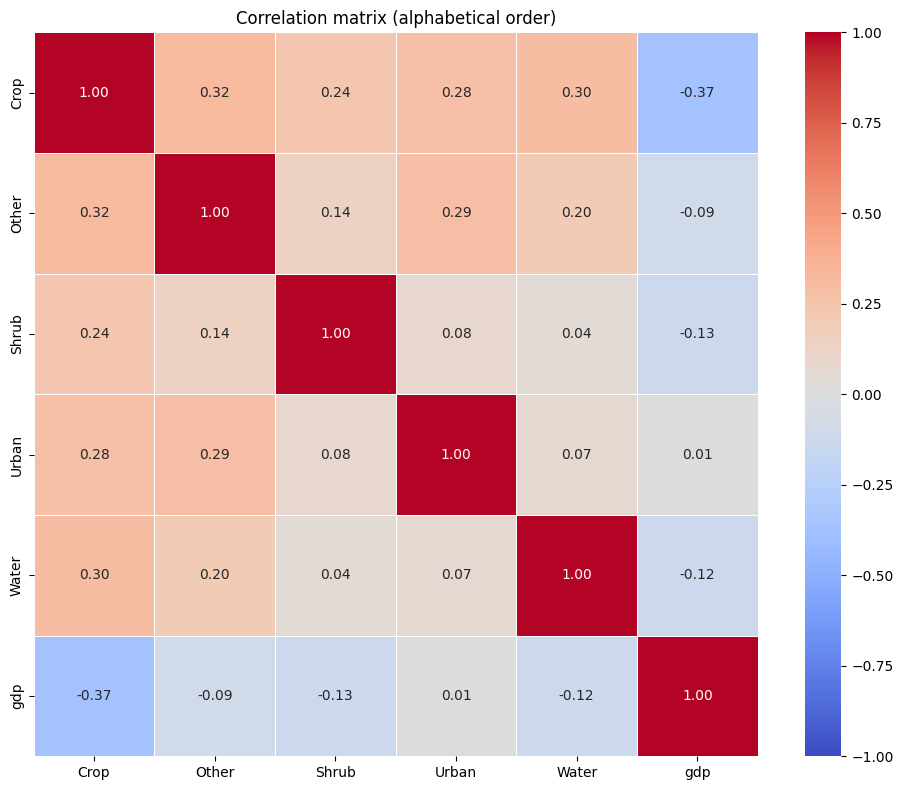

In [15]:
# 1) Drop empty geometries  -------------------------------
gdf = gdf.loc[~gdf.geometry.is_empty ].copy()

# 2) Select columns by *position* like R's `select(4, 6:42, 44)` --------
#    R uses 1-based indices. In Python (0-based), that becomes:
#    3, 5:42, 43   (note: the stop index is exclusive in Python slicing)
keep_pos = [3] + list(range(5, 42)) + [43]

# Safety: make sure positions are within bounds
ncols = gdf.shape[1]
keep_pos = [i for i in keep_pos if 0 <= i < ncols]

cols_by_pos = [gdf.columns[i] for i in keep_pos]

# Ensure we also have geometry in the frame to mimic the R grouping
subset = gdf[cols_by_pos + ["geometry"]].copy()

# 3) Group by identical geometry and average all variables --------------
#    Grouping directly on geometry objects can be finicky; using WKB bytes
#    as a stable key is safer, then reattach one representative geometry.
subset["__geom_wkb__"] = subset.geometry.apply(lambda g: g.wkb if g is not None else None)

num_cols = subset.select_dtypes(include=[np.number]).columns.tolist()

grp = (
    subset
    .groupby("__geom_wkb__", dropna=False)   # mean across duplicates of the same geometry
    [num_cols]
    .mean()
    .reset_index()
)

# Reattach one geometry per group (optional; we drop it later anyway)
wkb_to_geom = subset.drop_duplicates("__geom_wkb__").set_index("__geom_wkb__")["geometry"]
grp["geometry"] = grp["__geom_wkb__"].map(wkb_to_geom)
grp = grp.drop(columns="__geom_wkb__")

# 4) Drop geometry (to match R’s `select(-(geometry))`) and NAs ---------
X = grp.drop(columns=["geometry"])  # numeric-only table
X = X.dropna(axis=0, how="any")     # equivalent to R's na.omit()

# 5) Correlation matrix (rounded like in R) -----------------------------
corr_matrix = X.corr().round(2)

# 6) Optional: keep only your “Selected variables” by name --------------
# If these exact column names exist in your data, you can enforce the order:
selected = [
    "Forest","Shrub","Urban","Crop","Water","Other",
    "Max_WD_Winter","Max_DD_Winter","Mean_T_Spring","Mean_P_Spring","Max_DD_Spring",
    "Mean_T_Summer","Mean_P_Autumn","Max_WD_Autumn","Max_DD_Autumn",
    "gdp","pop_dens"
]
existing = [c for c in selected if c in X.columns]
if existing:
    corr_matrix = X[existing].corr().round(2)

# 7) “corrplot” style heatmap, ordered alphabetically -------------------
#    (R’s corrplot(order='alphabet') roughly equals sorting columns by name)
cols_sorted = sorted(corr_matrix.columns.tolist())
corr_sorted = corr_matrix.loc[cols_sorted, cols_sorted]

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_sorted, annot=True, vmin=-1, vmax=1, square=True,
    cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5
)
plt.title("Correlation matrix (alphabetical order)")
plt.tight_layout()

In [16]:
gdf.columns

Index(['NUTS_CO', 'NUTS_NA', 'RcrdTyp', 'Ttl_cs2', 'Forest', 'Shrub', 'Urban',
       'Crop', 'Water', 'Other', 'Mn_T_Wn', 'Tt_GD_W', 'Mx_GD_W', 'Mn_P_Wn',
       'Sm_P_Wn', 'Mx_WD_W', 'Mx_DD_W', 'Mn_T_Sp', 'Tt_GD_Sp', 'Mx_GD_Sp',
       'Mn_P_Sp', 'Sm_P_Sp', 'Mx_WD_Sp', 'Mx_DD_Sp', 'Mn_T_Sm', 'Tt_GD_Sm',
       'Mx_GD_Sm', 'Mn_P_Sm', 'Sm_P_Sm', 'Mx_WD_Sm', 'Mx_DD_Sm', 'Mn_T_At',
       'Tt_GD_A', 'Mx_GD_A', 'Mn_P_At', 'Sm_P_At', 'Mx_WD_A', 'Mx_DD_A',
       'area', 'popultn', 'gdp', 'incidnc', 'pop_dns', 'forest2', 'shrub2',
       'crop2', 'urban2', 'water2', 'other2', 'geometry', 'incidnc100',
       'I_class'],
      dtype='object')

In [3]:
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from shapely.geometry import shape
from sklearn.preprocessing import StandardScaler

# 1) Variables to average -------------------------------------------------
avg_var = [
    "Forest", "Shrub", "Urban", "Crop", "Water", "Other",
    "Mn_P_Wn", "Mx_WD_W", "Mx_DD_W",
    "Mn_T_Sp", "Mx_DD_Sp",
    "Mn_T_Sm", "Mx_WD_A", "Mx_DD_A",
    "gdp", "pop_dns"
]

# 2) Filter rows: non-empty geometry & RecordType != "ZIKV" --------------

# 3) Select columns (by NAME like in your R select) ----------------------
cols_keep = (["incidnc"] + avg_var )


# Supponiamo che il tuo GeoDataFrame si chiami fin_eu3
fin_eu3_scaled = gdf.copy()
fin_eu3_scaled = fin_eu3_scaled.loc[~fin_eu3_scaled.geometry.is_empty].copy()
# 1. Seleziona le colonne numeriche da standardizzare
# 2. Crea lo scaler
scaler = StandardScaler()

# 3. Applica lo scaling solo alle colonne selezionate
fin_eu3_scaled[cols_keep] = scaler.fit_transform(fin_eu3_scaled[cols_keep])




ModuleNotFoundError: No module named 'shapely'

In [18]:
# Compute centroids (in projected CRS if necessary)
if fin_eu3.crs.is_geographic:
    fin_eu3_proj = fin_eu3.to_crs(32633)
    cent_proj = fin_eu3_proj.geometry.centroid
    fin_eu3["cent"] = cent_proj.to_crs(fin_eu3.crs)
else:
    fin_eu3["cent"] = fin_eu3.geometry.centroid

# Drop rows with missing values
fin_eu3 = fin_eu3.dropna(how="any").copy()

# Identify numeric columns (exclude geometry)
non_feature_cols = {"geometry", "cent"}
numeric_cols = fin_eu3.drop(columns=[c for c in non_feature_cols if c in fin_eu3.columns]) \
                       .select_dtypes(include=[np.number]).columns.tolist()

# Standardize numeric variables
scaler = StandardScaler()
fin_eu3_scaled = fin_eu3.copy()
fin_eu3_scaled[numeric_cols] = scaler.fit_transform(fin_eu3_scaled[numeric_cols])

In [19]:
from libpysal.weights import DistanceBand
# --- 1) Make sure we’re working with the scaled GeoDataFrame ---
# In your pipeline this corresponds to: tmp <- st_as_sf(scaled_data)
scaled_gdf = fin_eu3_scaled.copy()

# --- 2) Reproject to a metric CRS and drop NAs ---
# R: st_transform(..., crs = 32633) then na.omit()
# EPSG:32633 = UTM zone 33N (meters). Adjust if your study area spans other zones.
scaled_gdf_meter = scaled_gdf.to_crs(32633).dropna(how="any").copy()

# Quick check (prints the CRS like st_crs)
print(scaled_gdf_meter.crs)

# --- 3) Build coordinates (centroids) and set max distance (meters) ---
# R: coords <- coordinates(scaled_spatial); max_distance <- 150000
coords = np.column_stack([
    scaled_gdf_meter.geometry.centroid.x,
    scaled_gdf_meter.geometry.centroid.y
])
max_distance = 150_000  # 150 km

# --- 4) Create a distance-band neighbor structure (binary weights) ---
# R: w <- dnearneigh(coords, 0, max_distance, longlat = FALSE)
#    w <- nb2listw(w, style = "B", zero.policy = TRUE)
#    W_matrix <- listw2mat(w)
#
# PySAL equivalent:
# - DistanceBand(..., binary=True) -> 'style="B"'
# - silence_warnings=True avoids warnings for islands (no neighbors)
# - DistanceBand excludes self-neighbors, so diagonal will be 0
W = DistanceBand(
    coords,
    threshold=max_distance,
    binary=True,
    silence_warnings=True  # analogous to zero.policy handling in R
)

# --- 5) Dense weight matrix (like listw2mat) ---
# W.full() returns (numpy_array, ids); we just take the array
W_matrix, _ = W.full()

# Optional: quick sanity checks
card_vals = list(W.cardinalities.values())
print("W shape:", W_matrix.shape)
print("Neighbors per unit (min/mean/max):",
      min(card_vals),
      np.mean(card_vals),
      max(card_vals))
print("Diagonal all zeros?", np.allclose(np.diag(W_matrix), 0.0))

EPSG:32633
W shape: (1134, 1134)
Neighbors per unit (min/mean/max): 0 38.832451499118164 114
Diagonal all zeros? True


In [20]:
!pip install esda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 kB 4.7 MB/s eta 0:00:00


In [22]:
import pandas as pd
from esda import Moran

# --- Make sure the data order matches the weights order ---
# DistanceBand without ids uses the row order at construction time.
# So we’ll compute y using the *same* frame used for W: scaled_gdf_meter
dfW = scaled_gdf_meter.reset_index(drop=True)

# Variables to test (mapped to your column names)
vars_to_test = [
    "incidnc",      # incidence
    "Forest", "Shrub", "Urban", "Crop", "Water", "Other",
    "Mn_P_Wn",      # Mean_P_Winter
    "Mx_WD_W",      # Max_WD_Winter
    "Mx_DD_W",      # Max_DD_Winter
    "Mn_T_Sp",      # Mean_T_Spring
    "Mx_DD_Sp",     # Max_DD_Spring
    "Mn_T_Sm",      # Mean_T_Summer
    "Mx_WD_A",      # Max_WD_Autumn
    "Mx_DD_A",      # Max_DD_Autumn
    "gdp",
    "pop_dns"
]

# Optional: pretty display names (to mirror your R labels)
pretty_names = {
    "incidnc": "incidence",
    "Mn_P_Wn": "Mean_P_Winter",
    "Mx_WD_W": "Max_WD_Winter",
    "Mx_DD_W": "Max_DD_Winter",
    "Mn_T_Sp": "Mean_T_Spring",
    "Mx_DD_Sp": "Max_DD_Spring",
    "Mn_T_Sm": "Mean_T_Summer",
    "Mx_WD_A": "Max_WD_Autumn",
    "Mx_DD_A": "Max_DD_Autumn",
    "pop_dns": "pop_dens"
}

# Keep only variables that actually exist after the NA drop used for W
vars_existing = [v for v in vars_to_test if v in dfW.columns]

results = []
for v in vars_existing:
    y = dfW[v].values.astype(float)
    # esda.Moran defaults to a z-test under normality (like moran.test)
    mi = Moran(y, W, two_tailed=True)
    results.append({
        "variable": pretty_names.get(v, v),
        "I": mi.I,
        "E[I]": mi.EI,
        "Var[I] (norm)": mi.VI_norm,
        "z (norm)": mi.z_norm,
        "p-value (norm, 2-tailed)": mi.p_norm
    })

morans_df = pd.DataFrame(results).sort_values("variable").reset_index(drop=True)
morans_df

,variable,I,E[I],Var[I] (norm),z (norm),"p-value (norm, 2-tailed)"
0,Crop,0.587645,-0.000883,0.000117,54.373898,0.000000e+00
1,Forest,0.529261,-0.000883,0.000117,48.979856,0.000000e+00
2,Max_DD_Autumn,0.742886,-0.000883,0.000117,68.716661,0.000000e+00
3,Max_DD_Spring,0.755513,-0.000883,0.000117,69.883196,0.000000e+00
4,Max_DD_Winter,0.756118,-0.000883,0.000117,69.939137,0.000000e+00
5,Max_WD_Autumn,0.620824,-0.000883,0.000117,57.439346,0.000000e+00
6,Max_WD_Winter,0.628570,-0.000883,0.000117,58.155029,0.000000e+00
7,Mean_P_Winter,0.661552,-0.000883,0.000117,61.202209,0.000000e+00
8,Mean_T_Spring,0.633612,-0.000883,0.000117,58.620819,0.000000e+00
9,Mean_T_Summer,0.747075,-0.000883,0.000117,69.103668,0.000000e+00


# Spatial model


EPSG:32633


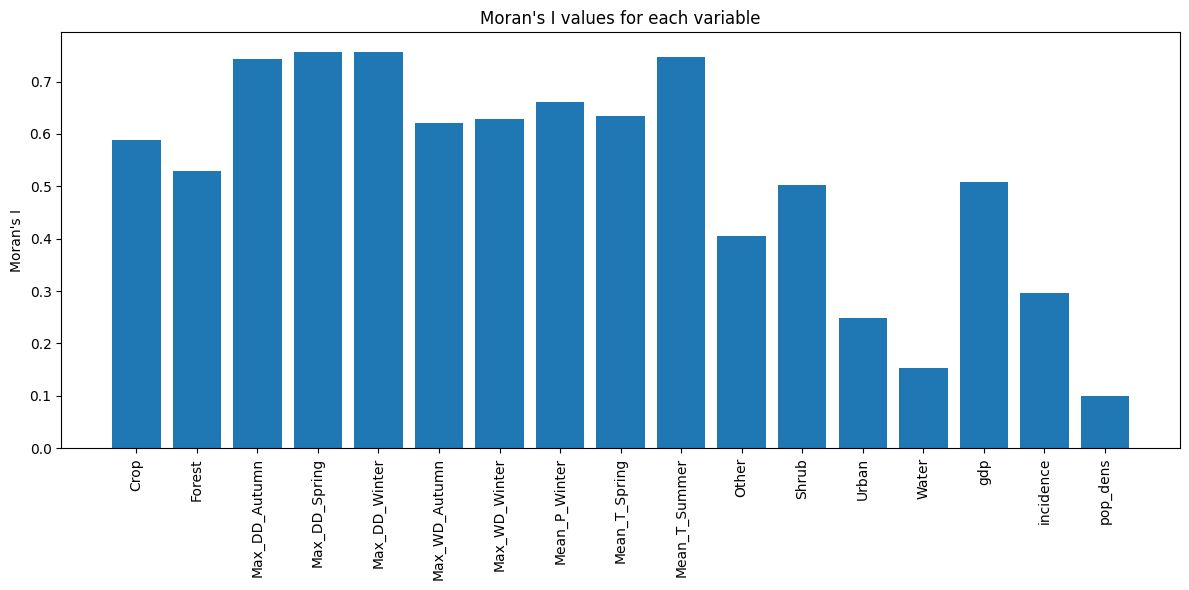

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(morans_df['variable'], morans_df['I'])
plt.xticks(rotation=90)
plt.ylabel("Moran's I")
plt.title("Moran's I values for each variable")
plt.tight_layout()
plt.show()

Given the results of the Moran's I analysis, where many variables show significant positive spatial autocorrelation (indicated by high Moran's I values and very low p-values), it absolutely makes sense to consider geospatial regression models, specifically focusing on **Spatially Lagged Geographically Weighted Regression (GWR)**.

**Comment and Discussion:**

Geospatial regression models are designed to explicitly account for spatial dependence among observations. When spatial autocorrelation is present in your data (as the Moran's I results strongly suggest), traditional regression models that assume independence between observations can lead to biased coefficient estimates, incorrect standard errors, and misleading inference.

The high Moran's I values for many of the environmental and socio-economic variables, as well as for the incidence of cases itself, indicate that areas close to each other tend to have similar values for these variables. This spatial clustering violates the assumptions of standard linear regression.

**Spatially Lagged Geographically Weighted Regression (GWR)** is a local spatial regression technique that goes beyond traditional global models (like Spatial Lag Models or Spatial Error Models) by allowing the relationships between the dependent variable and the independent variables to vary across space. The "spatially lagged" component explicitly includes the influence of neighboring values of the dependent variable, making it suitable for situations with spatial spillover effects that also exhibit local variations in relationships.

By using Spatially Lagged GWR, you can:

1.  **Identify spatially varying relationships:** Unlike global models that provide a single coefficient for each variable, GWR produces a set of local coefficients, showing how the strength and direction of relationships change across your study area.
2.  **Account for spatial dependence and heterogeneity:** The model simultaneously addresses spatial autocorrelation and the non-stationarity of relationships.
3.  **Gain localized insights:** Understand which factors are most influential in specific geographic areas.
4.  **Obtain more accurate and unbiased local coefficient estimates:** By considering local spatial relationships.
5.  **Perform valid local statistical inference:** Assess the significance of relationships at each location.

In conclusion, the significant spatial autocorrelation revealed by the Moran's I analysis, coupled with the potential for spatially varying relationships, makes Spatially Lagged Geographically Weighted Regression a highly appropriate and powerful modeling approach for your data. It will allow for a more nuanced understanding of the factors influencing the incidence of cases across different NUTS3 regions.

## Spatial regression model

In [24]:
from shapely.geometry import Point
from pyproj import CRS

# --- 1) Drop geometry from the metric GeoDataFrame (like st_drop_geometry) ---
tmp2 = scaled_gdf_meter.drop(columns="geometry").reset_index(drop=True).copy()

# --- 2) CRS as proj4 (optional; for parity with R) ---
# Note: modern proj favors WKT; proj4 is often deprecated. This is just to mirror your R line.
crs_proj4 = CRS.from_user_input(scaled_gdf_meter.crs).to_proj4()  # may return None on some systems
print("proj4 from scaled_gdf_meter:", crs_proj4)

# --- 3) Create a GeoDataFrame "SPDF-like" object from coords + attributes ---
# This mirrors: SpatialPointsDataFrame(coords, tmp2, proj4string=CRS(crs_proj4))
assert coords.shape[0] == tmp2.shape[0], "coords and attributes row count must match"
geom_points = gpd.points_from_xy(coords[:, 0], coords[:, 1])
spdf = gpd.GeoDataFrame(tmp2, geometry=geom_points, crs=scaled_gdf_meter.crs)
print(spdf.crs)  # check

# --- 4) Transform to UTM 33N (metric). If already 32633, this is a no-op. ---
spdf_metric = spdf.to_crs(32633)
print("spdf_metric CRS:", spdf_metric.crs)  # check

# --- 5) Spatial lag of Y using the weight matrix (like W_matrix %*% incidence) ---
# R used 'incidence'; your column is 'incidnc'
y = spdf_metric["incidnc"].to_numpy(dtype=float)
spdf_metric["Y_weighted"] = W_matrix @ y

# --- 6) Quick summary (to mirror R's summary()) ---
y_w = spdf_metric["Y_weighted"].to_numpy()
summary = {
    "min": float(np.nanmin(y_w)),
    "q1":  float(np.nanpercentile(y_w, 25)),
    "median": float(np.nanmedian(y_w)),
    "mean": float(np.nanmean(y_w)),
    "q3":  float(np.nanpercentile(y_w, 75)),
    "max": float(np.nanmax(y_w)),
    "std": float(np.nanstd(y_w, ddof=1)),
}
print("Y_weighted summary:", summary)

proj4 from scaled_gdf_meter: +proj=utm +zone=33 +datum=WGS84 +units=m +no_defs +type=crs
EPSG:32633
spdf_metric CRS: EPSG:32633
Y_weighted summary: {'min': -19.8434239904375, 'q1': -11.466077342833977, 'median': -3.0449382857491556, 'mean': -4.060334436090452, 'q3': -0.8727055121994061, 'max': 79.22601277527542, 'std': 10.87940605713683}


/usr/local/lib/python3.12/dist-packages/pyproj/crs/crs.py:1295: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [26]:
!pip install mgwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 18.8 MB/s eta 0:00:00


In [29]:
!pip install scikit-learn

In [64]:
from mgwr.gwr import Sel_BW, GWR
from sklearn.neighbors import BallTree # Keep BallTree if needed for bandwidth selection or other steps

# --- 1) Specify formula parts (mirror your R formula) -------------------
X_cols = [
    "Forest", "Shrub", "Urban", "Crop", "Water", "Other",
    "Mn_P_Wn",        # Mean_P_Winter
    "Mx_WD_W",        # Max_WD_Winter
    "Mx_DD_W",        # Max_DD_Winter
    "Mn_T_Sp",        # Mean_T_Spring
    "Mx_DD_Sp",       # Max_DD_Spring
    "Mn_T_Sm",      # Mean_T_Summer (Uncommented to match R code)
    "Mx_WD_A",        # Max_WD_Autumn
    "Mx_DD_A",        # Max_DD_Autumn
    "gdp", "pop_dns"
]

# Ensure all columns exist
missing = [c for c in X_cols + ["Y_weighted"] if c not in spdf_metric.columns]
if missing:
    raise KeyError(f"Missing columns for GWR: {missing}")

# Response and design matrix (mgwr expects 2D arrays)
y = spdf_metric["Y_weighted"].to_numpy().reshape((-1, 1))
X = spdf_metric[X_cols].to_numpy()

# Coordinates for mgwr GWR (needs to be a list or array of [x, y])
coords_mgwr = np.column_stack([
    spdf_metric.geometry.x,
    spdf_metric.geometry.y
])


# --- 2) Select adaptive bandwidth via AICc with bisquare kernel ----------
# fixed=False => adaptive; kernel='bisquare' mirrors GWmodel call
selector = Sel_BW(coords_mgwr, y, X, kernel='bisquare', fixed=False)
bw = selector.search(criteria='AICc')
print("Selected adaptive bandwidth (number of neighbors):", bw)

# --- 3) Fit GWR using mgwr ---------------------------------------------------------
gwr_model = GWR(coords_mgwr, y, X, bw=bw, fixed=False, kernel='bisquare')
gwr_res = gwr_model.fit()
print(gwr_res.summary())

# gwr_res has fields like:
# - gwr_res.params (n × (k+1))  -> local coefficients (incl. intercept)
# - gwr_res.localR2             -> local R^2
# - gwr_res.scale, gwr_res.aicc, gwr_res.enp, etc.

# --- 4) Local multicollinearity: condition numbers ----------------------
# We compute local condition numbers using the same adaptive k and bisquare weights.
# For each location i, build W_i (k weights), compute X_i' W_i X_i, then its condition number.

n, k = X.shape
tree = BallTree(coords_mgwr)  # coordinates in meters
dists, idxs = tree.query(coords_mgwr, k=int(bw))         # (n × bw) # Cast bw to int
# Adaptive bandwidth: use the kth distance at each i as local bandwidth h_i
h = dists[:, -1]                                # (n,)

# Bisquare weights: w = (1 - (d/h)^2)^2 for d < h, else 0
w = (1 - (dists / h[:, None])**2)**2
w[dists >= h[:, None]] = 0.0

# Function to compute local condition number at i
def local_condition_number(i):
    I = idxs[i]                   # neighbor indices for i (length = bw)
    Wi = np.diag(w[i])            # (bw × bw)
    Xi = X[I, :]                  # (bw × k)
    XtWX = Xi.T @ Wi @ Xi         # (k × k)
    # Regularize slightly if needed to avoid numerical issues
    # (use a tiny ridge if XtWX is singular)
    vals = np.linalg.svd(XtWX, compute_uv=False)
    # If all-zero (pathological), return NaN
    if np.allclose(vals, 0.0):
        return np.nan
    return float(vals.max() / np.maximum(vals.min(), 1e-12))

local_CN = np.array([local_condition_number(i) for i in range(n)])
spdf_metric["local_condition_number"] = local_CN

# Quick overview like R's printed object
print(pd.Series(local_CN).describe())

# If you want a tidy table alongside coefficients and local R2:
out = spdf_metric[["NUTS_NA", "NUTS_CO", "local_condition_number"]].copy() # Include identifiers and condition number
out[[f"beta_{name}" for name in (["Intercept"] + X_cols)]] = pd.DataFrame(
    np.column_stack([gwr_res.params[:,0], gwr_res.params[:,1:]]),
    index=spdf_metric.index,
    columns=[f"beta_{name}" for name in (["Intercept"] + X_cols)] # Assign column names
)
out["localR2"] = gwr_res.localR2

# Display the results
print("\nMGWR GWR Results (first 5 rows):")
print(out.head())

# You would typically proceed to visualize these local coefficients and R2 values on a map.

ImportError: cannot import name 'Sel_BW' from 'mgwr.gwr' (/usr/local/lib/python3.12/dist-packages/mgwr/gwr.py)

In [47]:
bw = Sel_BW(coords, y, X, kernel='bisquare').search(criterion='AICc')

In [48]:
print("Selected adaptive bandwidth (neighbors):", bw)
print("n, k:", n, k)

Selected adaptive bandwidth (neighbors): 86.0
n, k: 1134 15


In [49]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_df = pd.DataFrame(X, columns=X_cols)        # solo predittori (niente intercetta)
# (opzionale) se vuoi includere costante nell’OLS, NON servirà per VIF
X_for_vif = X_df.values

vif_global = pd.DataFrame({
    "variable": X_cols,
    "VIF": [variance_inflation_factor(X_for_vif, i) for i in range(X_for_vif.shape[1])]
}).sort_values("VIF", ascending=False).reset_index(drop=True)

print(vif_global)

    variable       VIF
0    Mx_WD_W  4.480636
1    Mn_T_Sp  3.360344
2    Mx_DD_A  3.232361
3    Mx_WD_A  3.005528
4    Mx_DD_W  2.718290
5    Mn_P_Wn  2.612603
6   Mx_DD_Sp  2.160921
7     Forest  1.928937
8       Crop  1.908684
9        gdp  1.710922
10     Other  1.502435
11     Shrub  1.314031
12   pop_dns  1.284040
13     Water  1.237809
14     Urban  1.192783


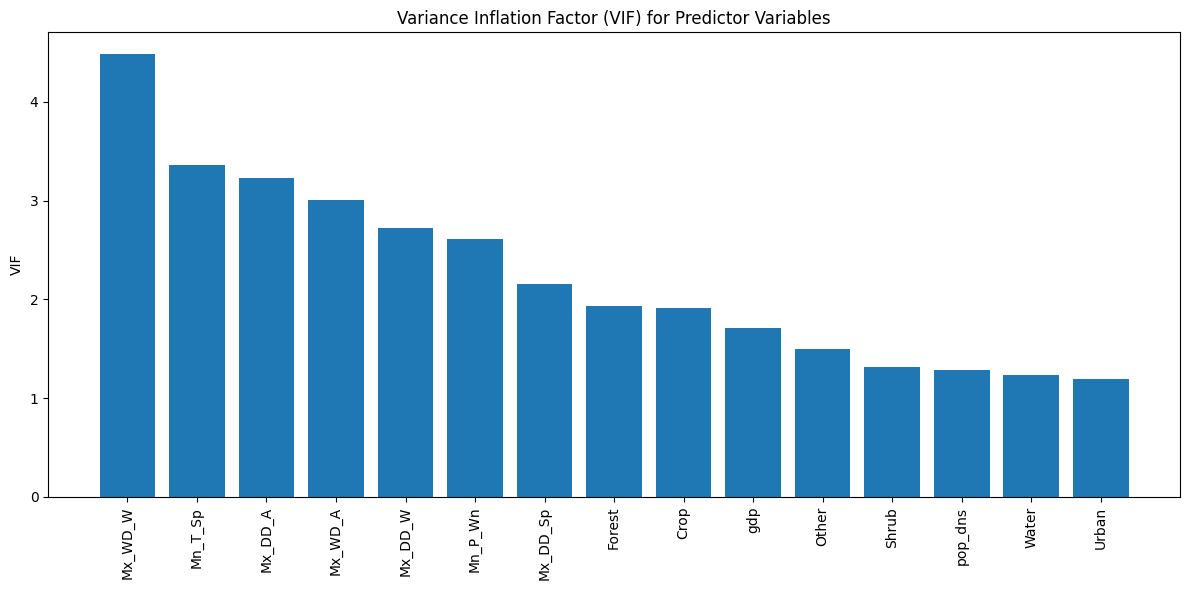

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(vif_global['variable'], vif_global['VIF'])
plt.xticks(rotation=90)
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF) for Predictor Variables')
plt.tight_layout()
plt.show()

**Comment on VIF Bar Plot:**

The Variance Inflation Factor (VIF) measures how much the variance of the estimated regression coefficients are increased due to collinearity. A VIF value greater than 5 or 10 is often considered an indicator of significant multicollinearity.

In the bar plot:

*   Most variables have relatively low VIF values (below 5), suggesting that multicollinearity is not a major issue for these predictors in the global model.
*   The variables with the highest VIFs are `Mx_WD_W`, `Mn_T_Sp`, `Mx_DD_A`, and `Mx_WD_A`, but even these are below the common threshold of 5. This indicates that while there is some degree of correlation among these predictors, it is likely not severe enough to cause unstable coefficient estimates in a standard linear regression.

For Geographically Weighted Regression (GWR), local multicollinearity can still be a concern, as the relationships are estimated locally. However, the global VIF analysis provides a useful initial check and suggests that the overall multicollinearity in the dataset is not excessively high. The GWR model itself will assess local multicollinearity through measures like local condition numbers, which will be more relevant for interpreting the local coefficients.

In [54]:
from sklearn.neighbors import BallTree

# coords: (n, 2) float array
n = coords.shape[0]
k_pred = X.shape[1]

# 1) make sure bw is an int and large enough for local regression
bw_int = int(np.ceil(bw))                  # mgwr can return np.float64
bw_int = max(bw_int, k_pred + 2)           # ensure enough neighbors
bw_int = min(bw_int, n)                    # cannot exceed sample size

# 2) query neighbors
tree = BallTree(coords)
dists, idxs = tree.query(coords, k=bw_int)   # (n, bw_int)

# 3) adaptive radii and bisquare weights
h = dists[:, -1]                              # (n,)
w = (1 - (dists / h[:, None])**2)**2
w[dists >= h[:, None]] = 0.0

def weighted_corr_matrix(Xi, wi, ridge=1e-8):
    """
    Xi: (m, k) predittori nei vicini di i
    wi: (m,) pesi positivi
    ritorna R (k×k): matrice di correlazione pesata
    """
    wi = wi.reshape(-1, 1)                       # (m,1)
    sw = wi.sum()
    # media pesata
    mu = (wi * Xi).sum(axis=0, keepdims=True) / sw
    # standardizzazione locale
    Z = Xi - mu                                  # (m,k)
    var = (wi * Z**2).sum(axis=0, keepdims=True) / sw
    std = np.sqrt(np.maximum(var, 1e-12))
    Z /= std
    # correlazione pesata = (1/sw) * Z^T diag(w) Z
    R = (Z.T @ (wi * Z)) / sw
    # simmetrizza numericamente
    R = 0.5 * (R + R.T)
    # ridge per stabilità
    R[np.diag_indices_from(R)] += ridge
    return R

local_vif = np.empty((n, k))
local_vif[:] = np.nan

for i in range(n):
    I = idxs[i]                   # indici dei vicini (bw,)
    wi = w[i]                     # pesi (bw,)
    Xi = X[I, :]                  # (bw, k)
    R = weighted_corr_matrix(Xi, wi)
    # VIF_j(i) = diag( inv(R) )
    try:
        Rinv = np.linalg.inv(R)
    except np.linalg.LinAlgError:
        # fallback: pseudo-inversa
        Rinv = np.linalg.pinv(R)
    local_vif[i, :] = np.diag(Rinv)

# attacco al GeoDataFrame
for j, name in enumerate(X_cols):
    df[f"VIF_{name}"] = local_vif[:, j]

# riepilogo (mediane dei VIF locali)
vif_local_summary = df[[f"VIF_{c}" for c in X_cols]].median().sort_values(ascending=False)
print(vif_local_summary)


VIF_Mn_P_Wn     6.155813
VIF_Mn_T_Sp     5.664951
VIF_Mx_WD_W     4.923504
VIF_Mx_WD_A     4.602958
VIF_Forest      4.194766
VIF_Mx_DD_Sp    3.837210
VIF_Crop        3.509322
VIF_Mx_DD_W     3.060826
VIF_pop_dns     3.052274
VIF_Urban       2.962778
VIF_Other       2.820440
VIF_Mx_DD_A     2.712161
VIF_gdp         2.474619
VIF_Shrub       2.183854
VIF_Water       1.904234
dtype: float64


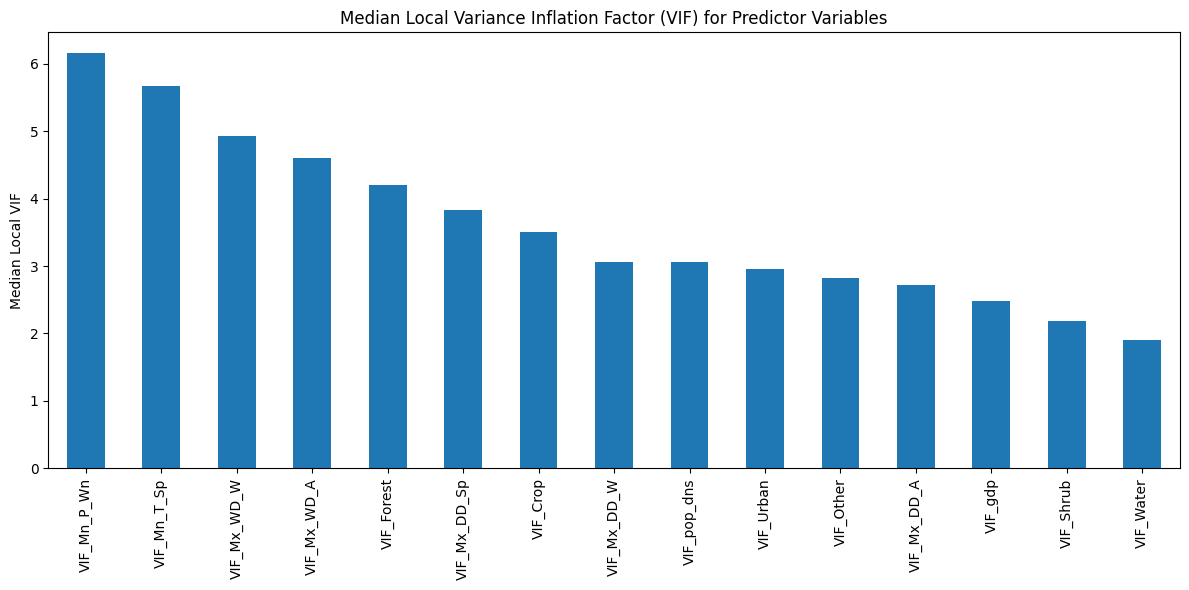

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
vif_local_summary.plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Median Local VIF')
plt.title('Median Local Variance Inflation Factor (VIF) for Predictor Variables')
plt.tight_layout()
plt.show()

**Comment on Median Local VIF Bar Plot:**

This bar plot shows the median of the local Variance Inflation Factor (VIF) for each predictor variable across all locations. The VIF measures the extent to which the variance of the estimated regression coefficient is increased due to multicollinearity.

*   Unlike the global VIF, which gives a single value for the entire dataset, local VIFs (or related local condition numbers) in GWR indicate how multicollinearity varies spatially.
*   A common threshold for concern with global VIF is often 5 or 10. While there isn't a universally agreed-upon threshold for local VIFs, values significantly higher than the global VIF or exceeding these conventional thresholds at specific locations suggest potential issues with multicollinearity in those areas.
*   In this plot, some variables like `VIF_Mn_P_Wn` and `VIF_Mn_T_Sp` show median local VIF values slightly above 5. This indicates that in some local areas, the correlation between these variables and other predictors is higher, which could potentially affect the stability and interpretation of their local coefficients in the GWR model in those specific regions.
*   However, the median values are not extremely high, suggesting that severe local multicollinearity might not be pervasive across the entire study area. It is important to examine the distribution of local VIFs (or condition numbers) spatially to identify specific locations where multicollinearity is a greater concern. The GWR model output will typically include measures like local condition numbers, which provide a more direct assessment of local multicollinearity at each location.

In [56]:
# --- 3) Fit GWR model (bisquare, adaptive, cross-validation) ----------
gwr_model = GWR(coords, y, X, bw=bw, kernel='bisquare', fixed=False, constant=True)
gwr_results = gwr_model.fit()

# --- 4) Esamina i risultati globali -----------------------------------
print(gwr_results.summary())

# --- 5) Estrai risultati locali (equivalente a $SDF in R) --------------
local_R2 = gwr_results.localR2
params = gwr_results.params  # coefficienti locali (incl. intercept nella prima colonna)
intercept = params[:, 0]
betas = params[:, 1:]  # coefficienti per ogni predittore

# --- 6) Riepilogo R2 locali -------------------------------------------
print("Local R2 (min, mean, max):",
      np.min(local_R2),
      np.mean(local_R2),
      np.max(local_R2))

Model type                                                         Gaussian
Number of observations:                                                1134
Number of covariates:                                                    16

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                          74013.885
Log-likelihood:                                                   -3978.287
AIC:                                                               7988.573
AICc:                                                              7991.122
BIC:                                                              66150.425
R2:                                                                   0.448
Adj. R2:                                                              0.441

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [57]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': proj})
world.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.3, zorder=0)
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.02, zorder=1)
gdf.plot(ax=ax, color='white', column edgecolor='black', linewidth=0.02, zorder=1)
# --- Style ---
ax.set_axis_off()
ax.set_xlim(-10, 31)
ax.set_ylim(35, 60)


# --- Add Cartopy gridlines ---
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}

plt.tight_layout()

array([[0.92377856],
       [0.96871023],
       [0.88205572],
       ...,
       [0.70411643],
       [0.37137874],
       [0.81336523]])

In [61]:
fin_eu3_scaled['local_R2']=local_R2

In [ ]:
!pip install mgwr==2.1.2 # Installing a specific stable version

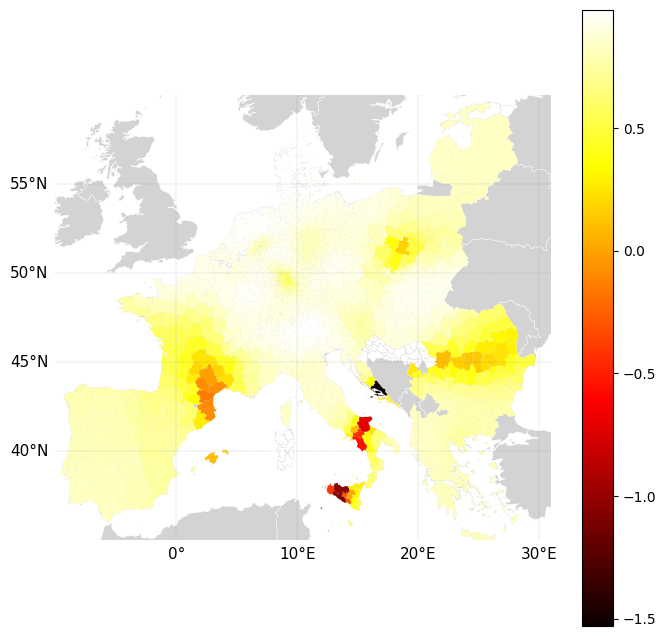

In [63]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': proj})
world.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.3, zorder=0)
gdf.plot(ax=ax, color='white', edgecolor='black', linewidth=0.02, zorder=1)
fin_eu3_scaled.plot(column='local_R2', ax=ax, cmap='hot', legend=True)


# --- Style ---
ax.set_axis_off()
ax.set_xlim(-10, 31)
ax.set_ylim(35, 60)


# --- Add Cartopy gridlines ---
gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 11}
gl.ylabel_style = {'size': 11}